In [1]:
using JLD, PyPlot

In [21]:
archivo="../JLDFiles/Desinhibida/180116s1cut_evento_1.jld"

"../JLDFiles/Desinhibida/180116s1cut_evento_1.jld"

In [22]:
Arxivo=load(archivo)

Dict{ByteString,Any} with 7 entries:
  "Canalesrespuesta" => Set([[41,3],[51,31],[47,24],[50,29],[30,2],[45,3],[43,9…
  "KTT_KInv"         => 4083x4083 Array{Float64,2}:…
  "LFPTotal"         => 64x64x2001 Array{Float64,3}:…
  "kCSDCorrecta"     => 64x64x2001 Array{Float64,3}:…
  "Nota"             => "Usamos las siguientes B y BT para obtener las Ks: Bcer…
  "freq"             => 7.022058198545425
  "CanalesSaturados" => Set([[47,62],[45,29],[60,2],[59,8],[1,1],[62,15],[40,60…

In [23]:
#nota=Arxivo["Nota"]

In [24]:
CSD=Arxivo["kCSDCorrecta"];
LFP=Arxivo["LFPTotal"];
#KOp=Arxivo["KTT_KInv"];

In [25]:
(alto,ancho,tmax)=size(CSD)

(64,64,2001)

In [26]:
satu=length(Arxivo["CanalesSaturados"])

13

In [27]:
listonga=(135,139,149)   

(135,139,149)

In [28]:
freq=Arxivo["freq"]
#retrazo=Arxivo["retrazo"]

7.022058198545425

In [29]:
retrazo=0

0

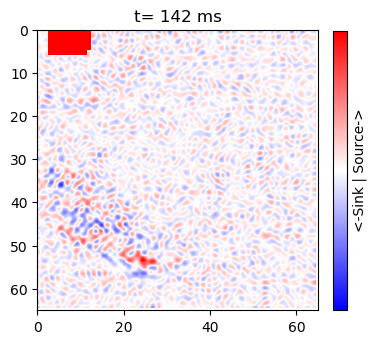

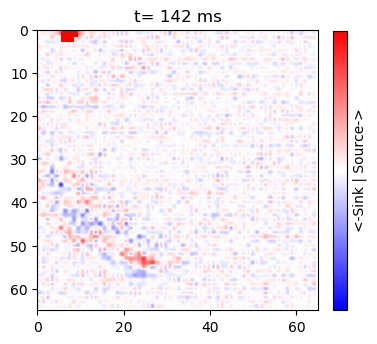

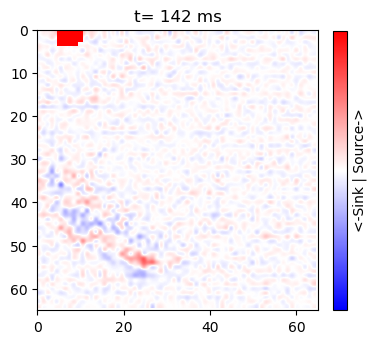

In [44]:
t=1000
#ion()
ioff()
lista=("sinc", "hanning", "gaussian")
limites=500
for interpol in lista
figure(figsize=(4,4))
    xlim(0,65)
    ylim(65,0)

    ejemplo=CSD[:,:,t]
    tiempo=round(Int,(t-retrazo)/freq)

tick_params(
    axis="both",          # changes apply to the x-axis
    which="both",      # both major and minor ticks are affected
   # bottom="off",      # ticks along the bottom edge are off
    top="off",
    right="off",
   # left="off",
# ticks along the top edge are off
   # labelbottom="off",
    labelleft="on")

    title("t= $tiempo ms")
    imagen=imshow((ejemplo), origin="lower", interpolation=interpol,
    cmap="bwr", 
                      vmin=-limites,vmax=limites, extent=[0,64.5,0.5,64.5])

cbx=colorbar(imagen, fraction=0.045, ticks=[]) 

cbx[:set_label]("<-Sink | Source->")
end

In [36]:
ioff()
limites=50
inicio=1009
retrazo=inicio
final=1500
paso=1
for t=inicio:paso:final
#t=954
    figura=figure(figsize=(4,4))
    xlim(0,65)
    ylim(65,0)

    ejemplo=CSD[:,:,t]
    tiempo=@sprintf("%3.2f",(t-retrazo)/freq);
    title("t= $tiempo ms")
    imagen=imshow((ejemplo), origin="lower", interpolation="gaussian",
                  cmap="coolwarm", 
                  vmin=-limites,vmax=limites, extent=[0.5,64.5,0.5,64.5])

   cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
   cbx[:set_label]("<-Sink | Source->")
    savefig("CSDDifferenceSmooth_140116s2_08_$t.svg",dpi=90)
    close(figura)
end
PyPlot.close_figs()

In [ ]:
bchica=readdlm("../kCSD/BceroDura-r-0.0675.dat")
btchica=readdlm("../kCSD/BtildeceroDura-r-0.0675.dat");

In [ ]:
aver=imshow(bchica,interpolation="nearest", cmap="gnuplot")
cbx=colorbar(aver)

In [ ]:
bgrande=readdlm("../kCSD/BceroDura-r-0.25.dat")
btgrande=readdlm("../kCSD/BtildeceroDura-r-0.25.dat");

In [ ]:
aver=imshow(b,interpolation="nearest", cmap="gnuplot")
cbx=colorbar(aver)

In [ ]:
size(bgrande)
tu=vec(bgrande[64,:])
te=vec(bchica[64,:])

In [ ]:
plot(1:127,tu)
plot(1:127,te)

In [ ]:
bgmin=bgrande/minimum(bgrande)

In [ ]:
cloack=bgmin-brmin

In [ ]:
imshow(cloack,cmap="gnuplot",interpolation="none")
colorbar()

In [ ]:
xlim(0,65)
ylim(0,65)
imshow(KOp,cmap="gnuplot", vmin=-1,vmax=1)
colorbar()

In [ ]:
KOp[1:64,1:64]

# Pruebas de Estabilidad en una submatrix pequeñita

In [148]:
Kdd=readdlm("../kCSD/Krevisarestable.dat")
Ktildedd=readdlm("../kCSD/KTilderevisarestable.dat");

In [149]:
size(Kdd)

(575,575)

In [150]:
sublfp=LFP[41:64,11:34,1000]
saturados=Set{Array{Int,1}}()
push!(saturados, [1,1])

Set([[1,1]])

In [151]:
saturados

Set([[1,1]])

In [152]:
Kdd

575x575 Array{Float64,2}:
 81.0543  42.1742  43.3544  43.8367  …  26.0077  25.1854  24.296   23.3344
 42.1742  89.0444  45.6091  46.3727     26.9753  26.1295  25.2142  24.2244
 43.3544  45.6091  94.9895  48.2298     27.8593  26.993   26.0544  25.0388
 43.8367  46.3727  48.2298  99.6159     28.6682  27.7842  26.8251  25.786 
 43.8925  46.5174  48.7035  50.2867     29.4051  28.5064  27.5294  26.4692
 43.6572  46.2884  48.6005  50.5395  …  30.0707  29.1604  28.1683  27.0897
 43.2127  45.8073  48.1556  50.2422     30.6647  29.7459  28.7417  27.6474
 42.6138  45.1471  47.4831  49.6238     31.1857  30.2617  29.2484  28.1412
 41.8986  44.3562  46.6512  48.7945     31.6316  30.7058  29.6865  28.5693
 41.0944  43.468   45.7042  47.819      31.9999  31.0754  30.0534  28.9294
 40.2207  42.506   44.6726  46.7392  …  32.2871  31.3675  30.3461  29.2183
 39.2915  41.4867  43.5772  45.5831     32.4898  31.5782  30.5607  29.4324
 38.3169  40.4217  42.4324  44.3697     32.6038  31.7036  30.6931  29.5676

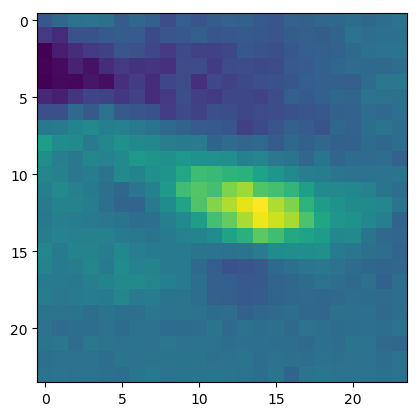

PyObject <matplotlib.image.AxesImage object at 0x7fea8aa5fe10>

In [153]:
imshow(sublfp)

In [154]:
todaslasX=Array[]

ncuad=24
Ntot=ncuad^2

for j=1:ncuad,k=1:ncuad
    push!(todaslasX,[j,k])
end

xpurgadas=filter(q->!(q in saturados), todaslasX)
nbuenas=length(xpurgadas)

CSDtentativa=zeros(Ntot)
CSD=zeros(sublfp)

lfpv=zeros(nbuenas)

println("Acomodando los LFP correctos")

for j=1:nbuenas
    renglon=xpurgadas[j][1]
    columna=xpurgadas[j][2]
    lfpv[j]=sublfp[renglon,columna]
end


Acomodando los LFP correctos


In [155]:
rangolambda=20


CSD=zeros(Float64,ncuad,ncuad,rangolambda)
CSDTentativa=zeros(nbuenas,rangolambda)

#nbuenas es la long de la diagonal!!!
## y de cualquier lado de la matriz, daah..
KLambda=deepcopy(Kdd)
KTT=zeros(Kdd)

for l=1:rangolambda
    lambda=l/(rangolambda)
    println(lambda, " ",KLambda[8,8])
    for j=1:nbuenas
        KLambda[j,j]=KLambda[j,j]/2.0*(1.8-0.4*lambda)
    
        KTT=transpose(Ktildedd)*inv(KLambda)
    end
    println(lambda, ",", KTT[8,8], " ", KLambda[8,8])
    CSDTentativa[:,l]=KTT*lfpv 
    
end


for j=1:nbuenas
    renglon=xpurgadas[j][1]
    columna=xpurgadas[j][2]
    CSD[renglon,columna,:]=CSDTentativa[j,:]
end


println("terminando calculo")


0.05 110.126614487913
0.05,0.0006471680551273026 98.01268689424258
0.1 98.01268689424258
0.1,1.7077532894496053e-8 86.25116446693347
0.15 86.25116446693347
0.15,-0.0018326718428634632 75.03851308623213
0.2 75.03851308623213
0.2,-0.009596459257034656 64.53312125415962
0.25 64.53312125415962
0.25,-3.361630897044283 54.85315306603568
0.3 54.85315306603568
0.3,0.01917070737422511 46.076648575469974
0.35 46.076648575469974
0.35,0.010691982922424053 38.243618317640085
0.4 38.243618317640085
0.4,-0.0008425967765711688 31.359767020464872
0.45 31.359767020464872
0.45,-0.012184343737733843 25.401411286576547
0.5 25.401411286576547
0.5,0.01426702018329427 20.32112902926124
0.55 20.32112902926124
0.55,0.03944542059046523 16.05369193311638
0.6 16.05369193311638
0.6,-0.024895030893383147 12.521879707830776
0.65 12.521879707830776
0.65,-0.009412088616607644 9.641847375029698
0.7 9.641847375029698
0.7,-0.0055280526244360735 7.32780400502257
0.75 7.32780400502257
0.75,-0.0036821245650835387 5.495853003

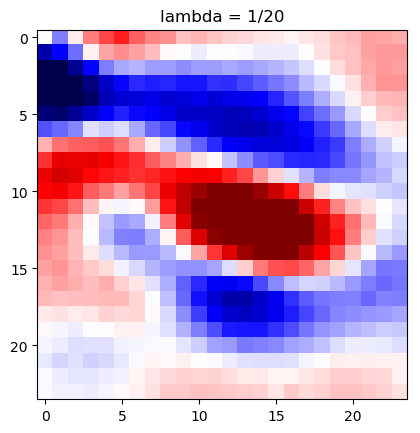

PyObject <matplotlib.text.Text object at 0x7fea8adb5518>

In [156]:
vlim=20
imshow(CSD[:,:,2],cmap="seismic",vmin=-vlim,vmax=vlim)
title("\lambda = 1/20")

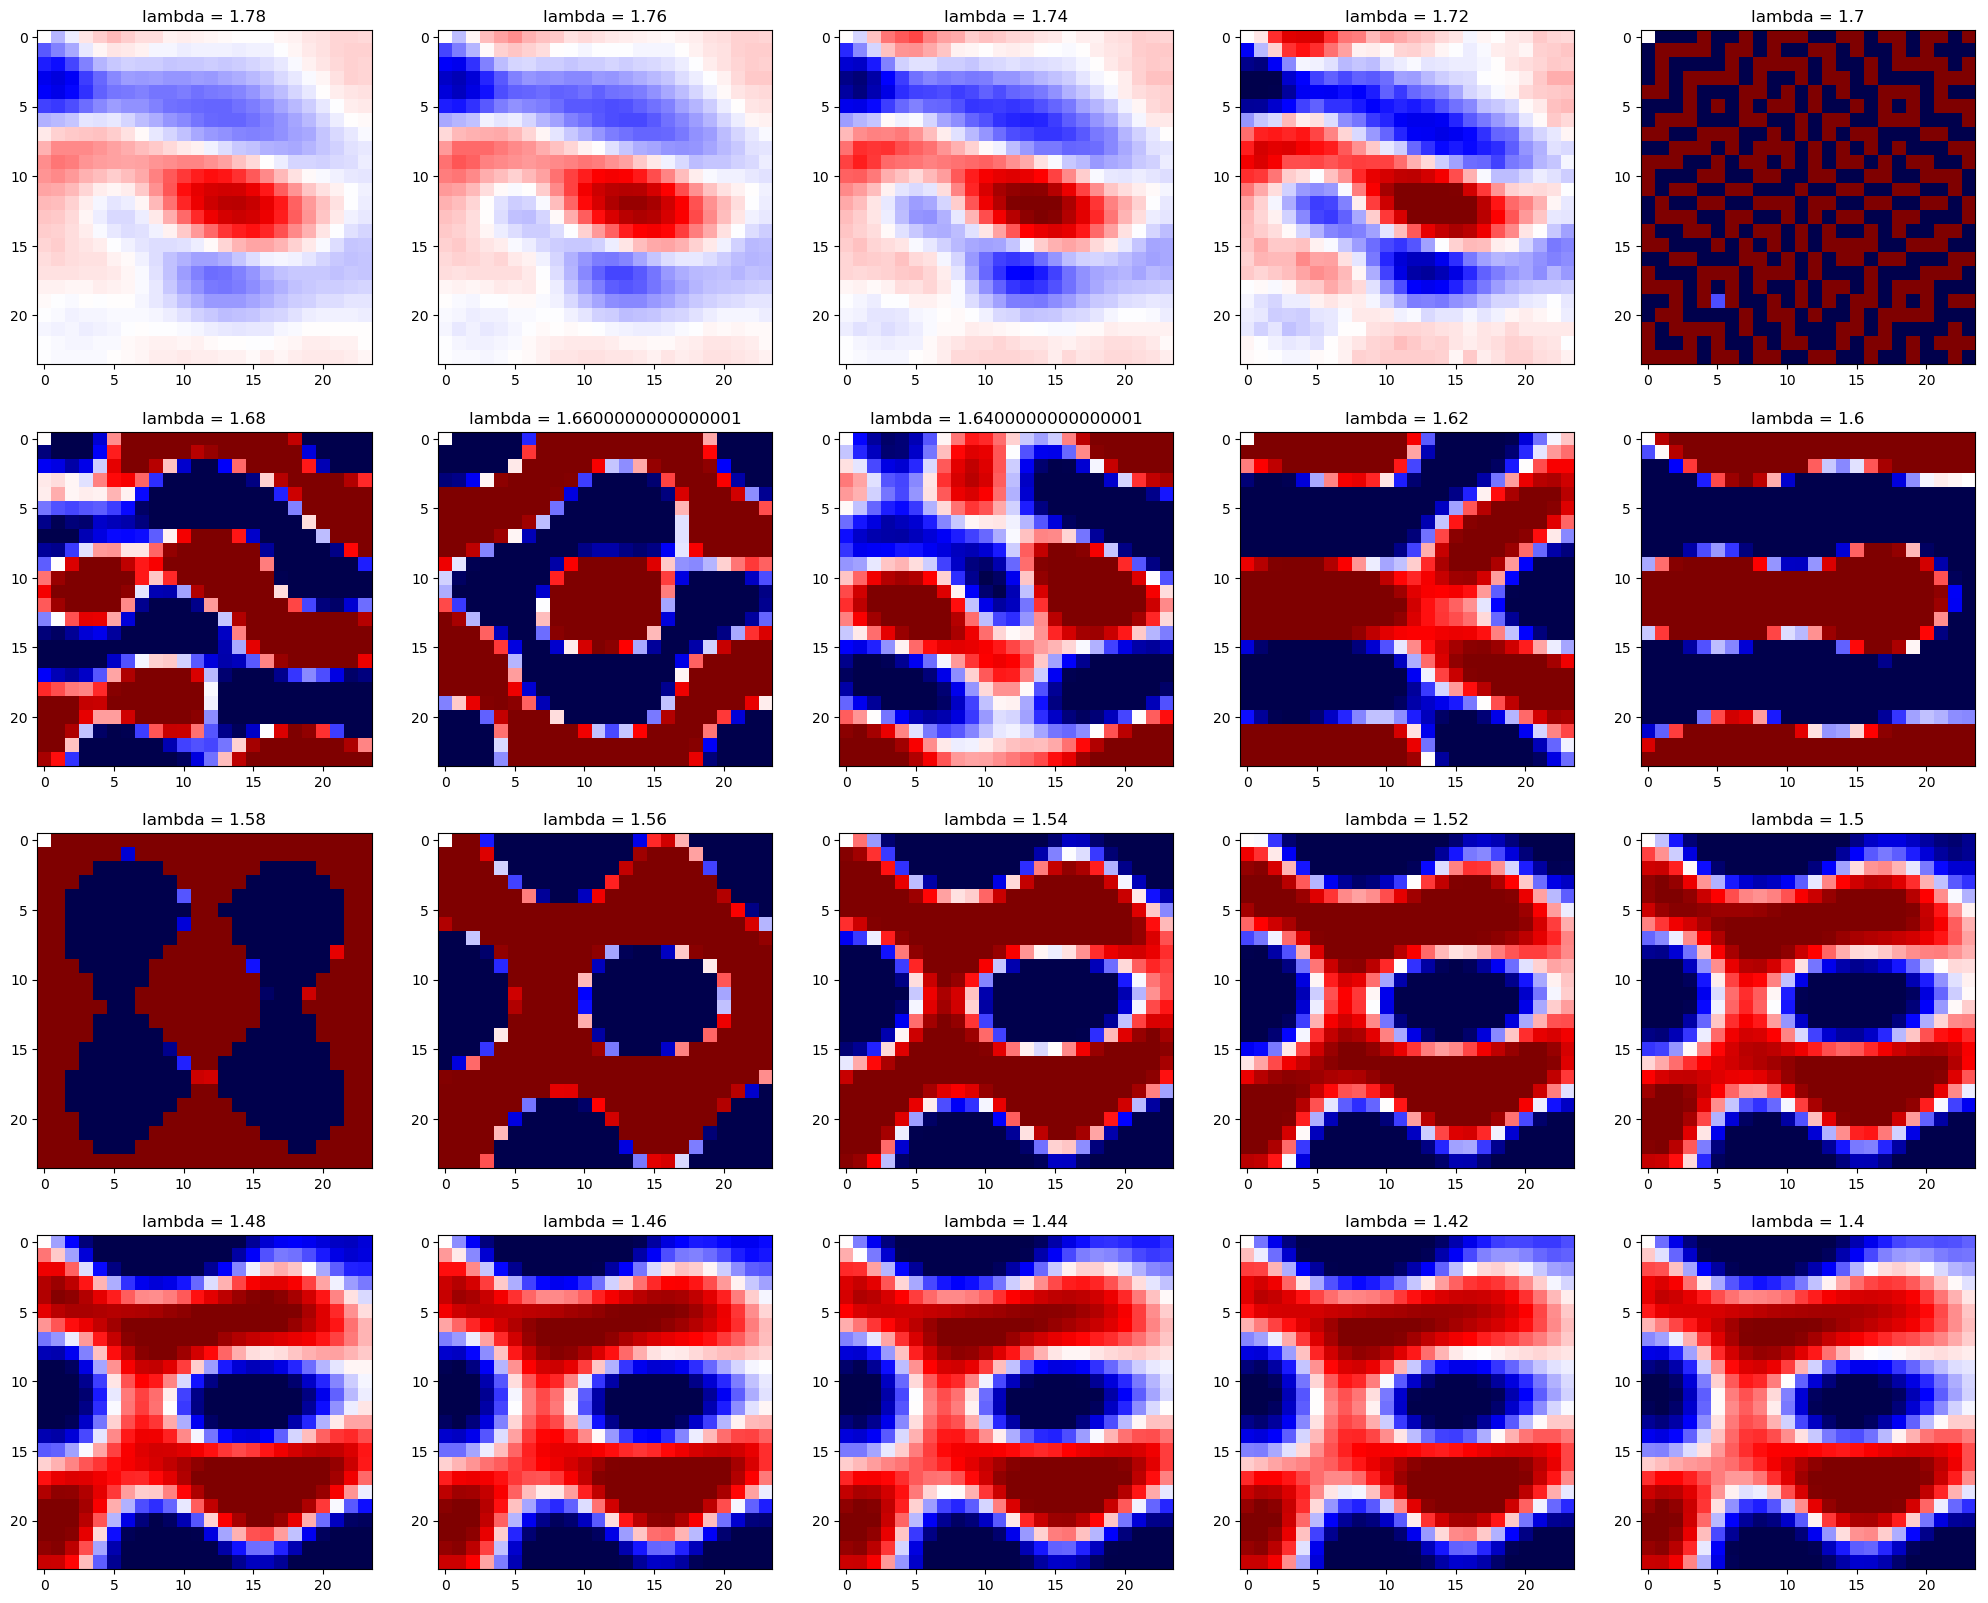

In [158]:
farofa, lista=subplots(4,5, figsize=(25,20))
vlim=40
for j=1:rangolambda
    pu=ceil(Int,j/5)
    pa=mod(j,5)
    reallambda=(1.8-0.4*j/rangolambda)
    if pa==0; pa=5;end
   # println(pa,", ",pu)
    lista[pu,pa][:imshow](CSD[:,:,j],cmap="seismic",vmin=-vlim,vmax=vlim)
    lista[pu,pa][:set_title]("lambda = $reallambda")
end
savefig("VarioskCSD01.png",dpi=92)

In [113]:
for j=1:rangolambda
    pu=ceil(Int,j/5)
    pa=mod(j,5)
    if pa==0; pa=5 ; end
    println(pu," ",pa)
end

1 1
1 2
1 3
1 4
1 5
2 1
2 2
2 3
2 4
2 5
3 1
3 2
3 3
3 4
3 5
4 1
4 2
4 3
4 4
4 5
